In [2]:
import networkx as nx
import numpy as np
from scipy.sparse import diags
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:

karate_graph = nx.karate_club_graph()

num_clusters = 2

In [3]:
adjacency_matrix = nx.adjacency_matrix(karate_graph).toarray()
n = len(karate_graph)
I = np.eye(n)

laplacian_matrix = I - adjacency_matrix
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

min_eigenvalue_index = np.argmin(eigenvalues)
min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1]


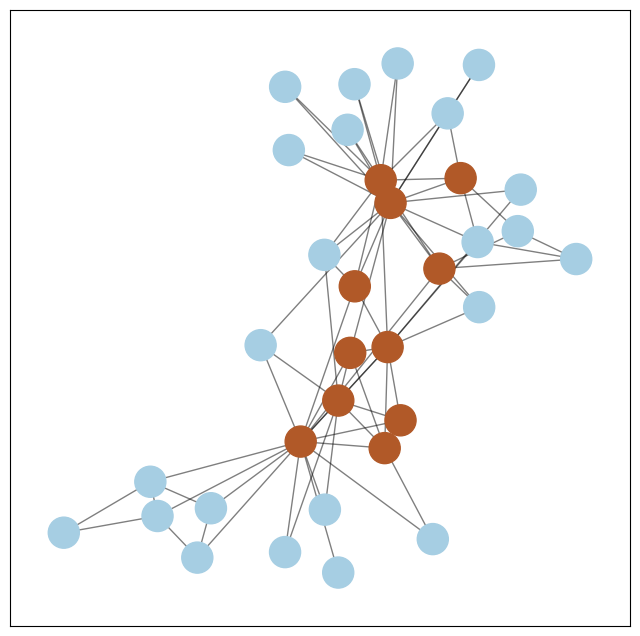

In [6]:

print(cluster_labels)

pos = nx.spring_layout(karate_graph)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate_graph, pos, node_color=cluster_labels, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate_graph, pos, alpha=0.5)
plt.show()

In [4]:
facebook = pd.read_csv(
    "./facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook


,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [8]:
G_facebook = nx.from_pandas_edgelist(facebook, "start_node", "end_node")


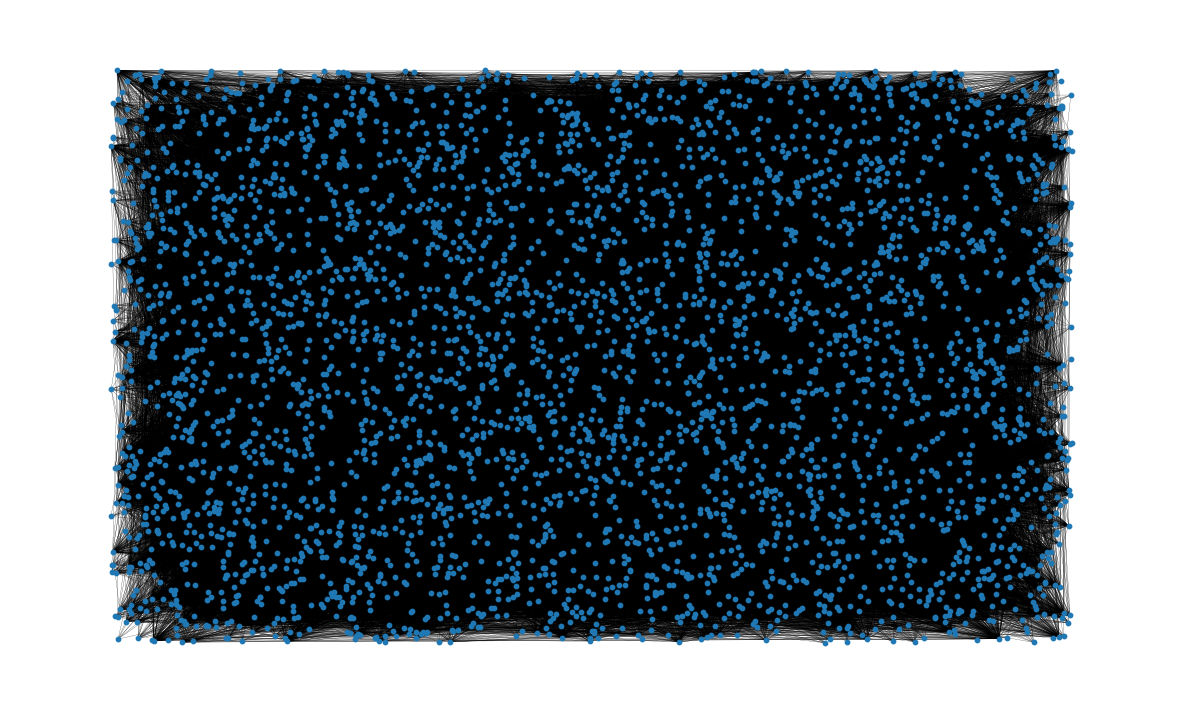

In [9]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G_facebook, pos=nx.random_layout(G_facebook), ax=ax, **plot_options)


In [12]:
adjacency_matrix = nx.adjacency_matrix(G_facebook).toarray()
n = len(G_facebook)
I = np.eye(n)

laplacian_matrix = I - adjacency_matrix
eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)

min_eigenvalue_index = np.argmin(eigenvalues)
min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 0 0]


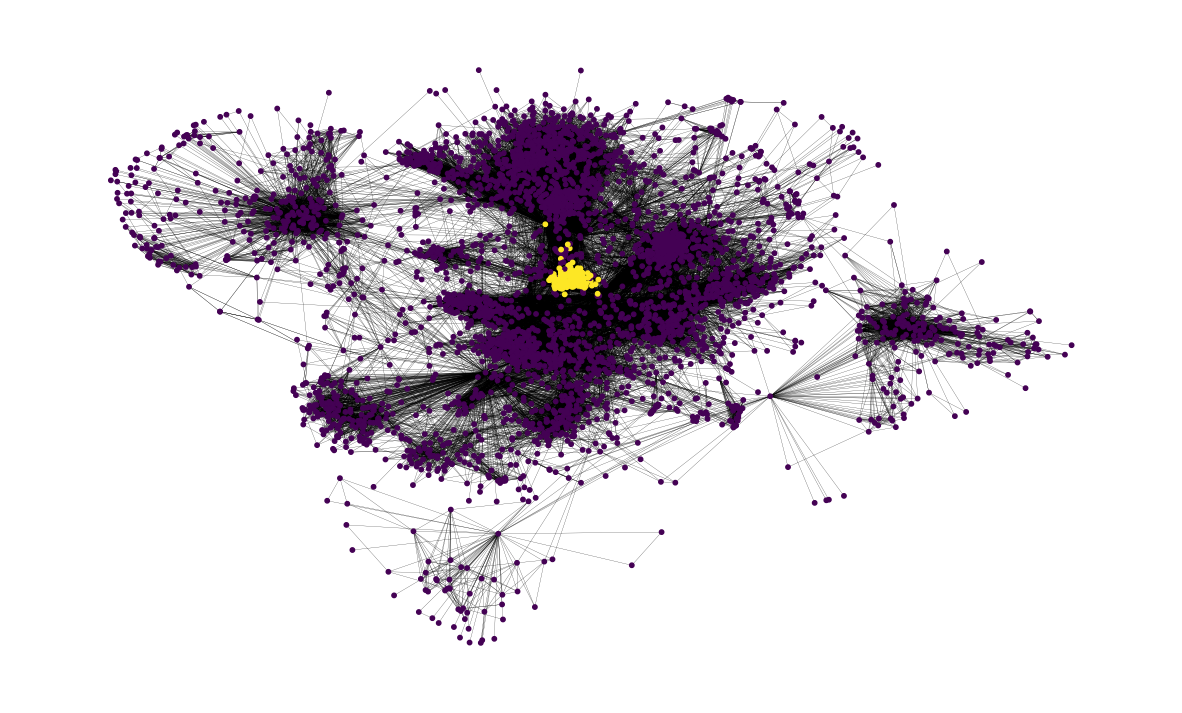

In [16]:

print(cluster_labels)

pos = nx.spring_layout(G_facebook, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G_facebook, pos=pos, ax=ax, node_color=cluster_labels, **plot_options)